In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.shape

(150, 5)

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


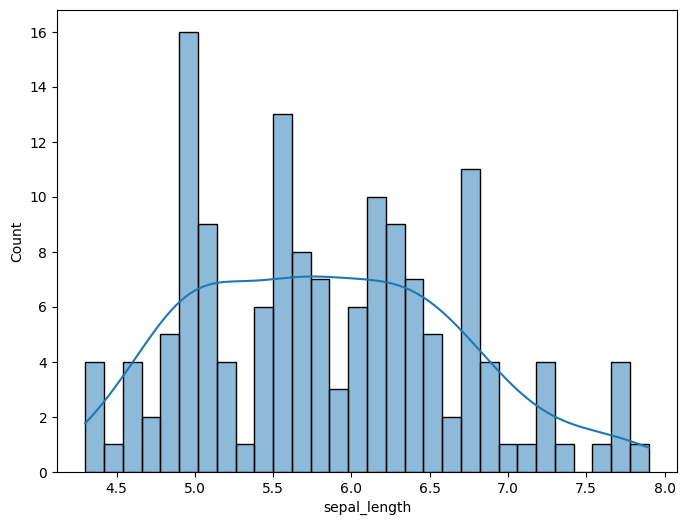

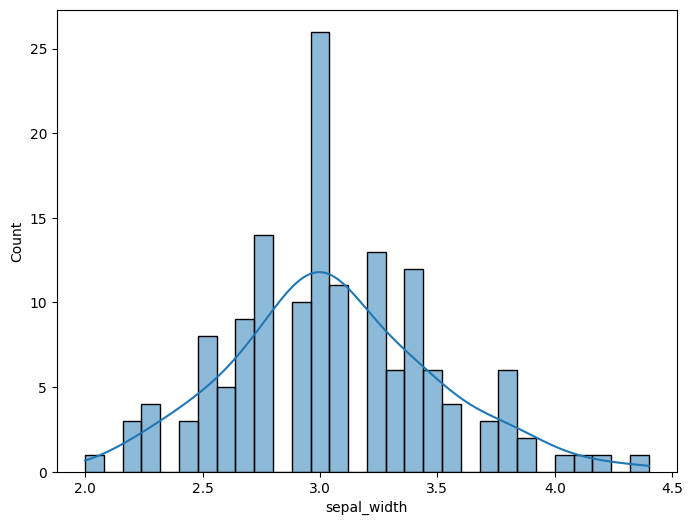

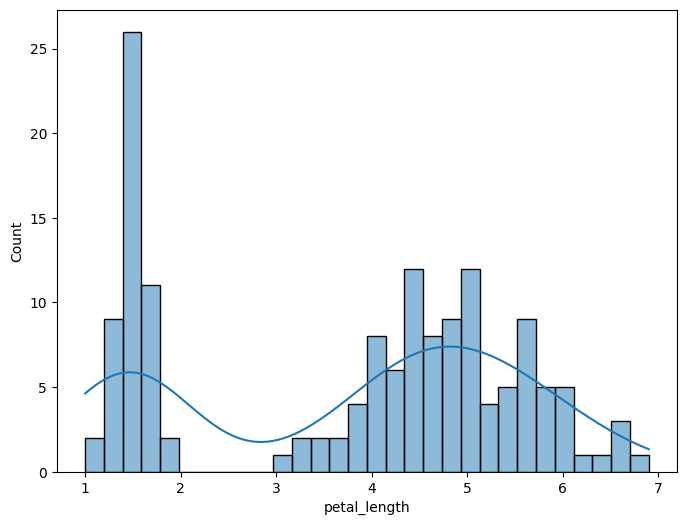

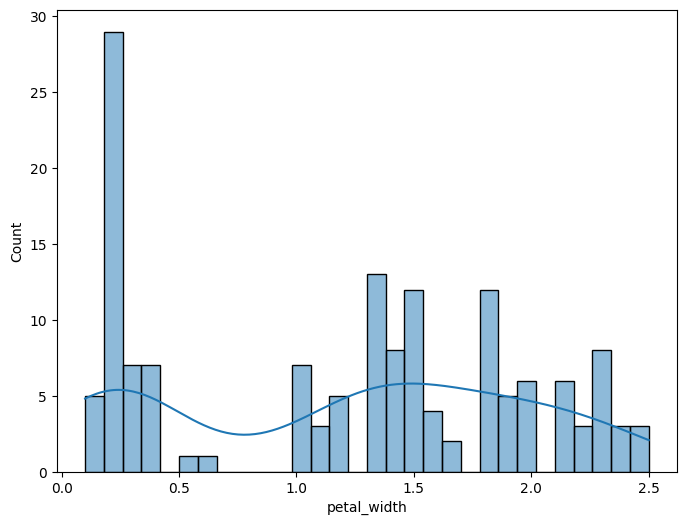

In [8]:
num_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for col in num_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(iris[col], bins=30, kde=True)
    plt.show()

<Axes: xlabel='species', ylabel='count'>

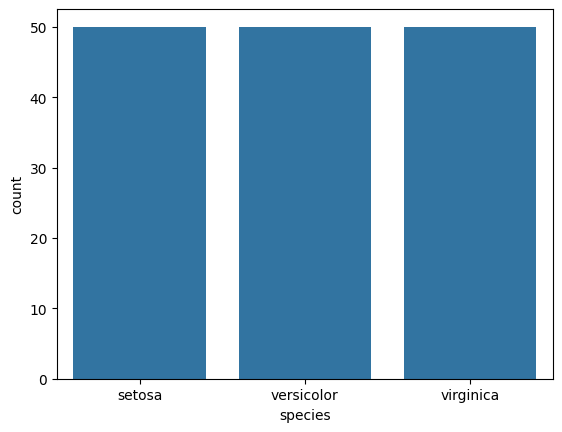

In [9]:
sns.countplot(x=iris['species'])

In [10]:
new_iris = iris.copy()
new_iris.shape

(150, 5)

In [11]:
new_iris.drop_duplicates(inplace=True)
new_iris.shape

(149, 5)

In [12]:
new_iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [13]:
new_iris['species'] = new_iris['species'].map({'setosa':1, 'versicolor':2, 'virginica':3})

In [14]:
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_iris[num_columns] = scaler.fit_transform(new_iris[num_columns])

In [16]:
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.898033,1.012401,-1.333255,-1.308624,1
1,-1.139562,-0.137353,-1.333255,-1.308624,1
2,-1.381091,0.322549,-1.390014,-1.308624,1
3,-1.501855,0.092598,-1.276496,-1.308624,1
4,-1.018798,1.242352,-1.333255,-1.308624,1


In [17]:
X = new_iris.drop('species', axis=1)
y = new_iris['species']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(C=1)

linear_svm.fit(X_train, y_train)

LinearSVC(C=1)

In [20]:
y_pred = linear_svm.predict(X_test)

In [21]:
# Provide all 4 features for each sample
X_new = [
	[5.5, 2.5, 4.0, 1.3],  # example values for sepal_length, sepal_width, petal_length, petal_width
	[5.0, 3.4, 1.5, 0.2]   # another example
]

# Scale using the same scaler as training
X_new_scaled = scaler.transform(X_new)

# Predict using the trained model
linear_svm.predict(X_new_scaled)

d:\coding playground\hands-on-ML\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\coding playground\hands-on-ML\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([2, 1])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96

In [45]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])